In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_boston

In [4]:
data = np.loadtxt(r'C:\Users\Sumit\Downloads\ML\New folder\26.Linear Regression\26.Linear Regression\11.Analysis of LR using dummy Data\data.csv', delimiter = ',')

In [5]:
x = data[:,0].reshape(-1, 1)
y = data[:,1]
x.shape

(100, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [7]:
alg1 = LinearRegression()

In [8]:
alg1.fit(X_train,y_train)

LinearRegression()

In [9]:
print('Value of cofficient m :' , alg1.coef_)
print('Value of intercept y : ' , alg1.intercept_)

Value of cofficient m : [1.23946236]
Value of intercept y :  11.639291467757147


## Plot training Data

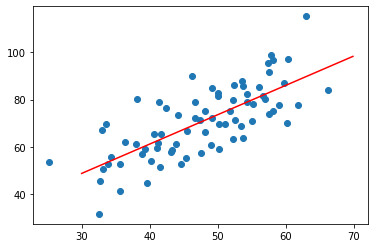

In [10]:
import matplotlib.pyplot as plt

m = alg1.coef_[0]
c = alg1.intercept_

# now making a line with these values of m and c to fit in training data:

x_line = np.arange(30,70,0.1)  # random poins for a line 
y_line = m * x_line + c  # required line with m and c 


plt.plot(x_line, y_line, "r") # our made line plot

train_1d = X_train.reshape(75) # X_train have 75 points , reshaping it to make scatter plot 

plt.scatter(X_train, y_train) 
plt.show()

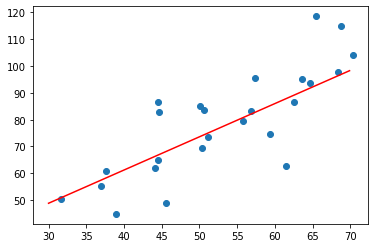

In [11]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30,70,0.1)
y_line = m * x_line + c
plt.plot(x_line, y_line, "r")
train_1d = X_test.reshape(25)
plt.scatter(X_test, y_test)
plt.show()

In [12]:
score_on_test_data = alg1.score(X_test,y_test)
score_on_test_data  # the more it is close to 1 , the best it is 

0.6315374642306351

In [13]:
score_on_train_data = alg1.score(X_train,y_train)
score_on_train_data

0.543668199869044

## New

In [74]:
x = data[:,0]
y = data[:,1]
x.shape
y.shape


(100,)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [76]:
def fit(X_train , y_train):
    num1 = (X_train*y_train).mean() - X_train.mean()*y_train.mean()
    den1 = (X_train**2).mean() - (X_train.mean())**2
    m = num1/den1
    c = y_train.mean() - m*(X_train.mean())
    return m , c

In [203]:
def prdict(x ,m,c):
    return m*x+c

In [78]:
def score(y_truth , y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1-u/v

In [79]:
m, c = fit(X_train, y_train)
# test data
y_test_pred = prdict(X_test, m, c)
print("Test Score: ",score(y_test, y_test_pred))

#train data
y_train_pred = prdict(X_train, m, c)
print("Train Score: ", score(y_train, y_train_pred))
print("M, C ", m , c)
# print("Cost on training data ", cost(X_train,y_train, m, c ))

Test Score:  0.5326224732982873
Train Score:  0.6135013842526489
M, C  1.3005514743403332 7.924696824569651


### ***

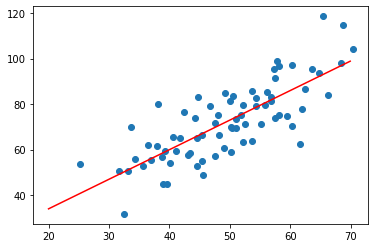

In [122]:
x_line = np.arange(20,70,0.1)   # random poins for a line 
y_line = m * x_line + c  # required line with m and c 

plt.plot(x_line, y_line, "r") # our made line plot

train_1d = X_train # X_train have 75 points , reshaping it to make scatter plot 

plt.scatter(X_train, Y_train) 
plt.show()

### Gradient Descent

In [208]:
def step_gd(points, learning_rate , m , c):
    M = len(points)
    m_deriv = 0
    c_deriv = 0
    for i in range(M):
        x = points[i , 0]
        y = points[i , 1]
        m_deriv = m_deriv + (-2/M)*((y - m*x - c)*x)
        c_deriv = c_deriv + (-2/M)*(y - m*x - c)
    new_m = m - learning_rate*m_deriv
    new_c = c - learning_rate*c_deriv
    return new_m , new_c
    

In [209]:
def cost_func(points , m ,c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i , 0]
        y = points[i , 1]
        total_cost = total_cost + (1/M)*(y - m*x - c)
        
    return total_cost
    
    

In [210]:
def gd(points, learning_rate , num_itration):
    m = 0
    c = 0
    for i in range(num_itration):
        m , c = step_gd(points, learning_rate , m , c)
#         print(i , 'Cost' , cost_func(points , m , c))
    return m , c 

In [211]:
def run():
    num_itration = 100
    learning_rate = 0.0001
    points = data
    m,c = gd(points, learning_rate , num_itration)
    return m , c

In [212]:
m ,c = run()
X_train, X_test, y_train, y_test = train_test_split(x, y)

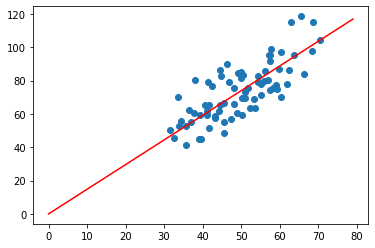

In [213]:
x_line = np.arange(80)
y_line = m*x_line + c
plt.plot(y_line,'r')
plt.scatter(X_train , y_train )

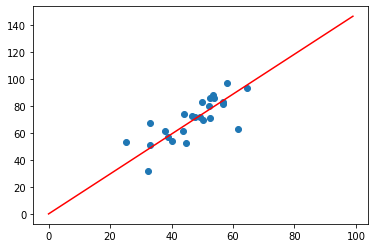

In [214]:
x_line = np.arange(100)
y_line = m*x_line + c
plt.plot(y_line,'r')
plt.scatter(X_test , y_test )

In [215]:
y_pred = prdict(X_train , m , c)

score(y_train , y_pred)


0.5921219306617701

In [216]:
y_pred = prdict(X_test , m , c)

score(y_test , y_pred)


0.5686929686886948

## Diabetes Dataset

In [218]:
from sklearn import datasets

In [221]:
diabetes = datasets.load_diabetes()

In [222]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [224]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [234]:
diabetes['target'].shape

(442,)

In [237]:
features = pd.DataFrame(diabetes['data'] , columns = diabetes['feature_names'])

In [295]:
X_train, X_test, y_train, y_test = train_test_split(features , diabetes['target'] )

In [240]:
X_train.shape

(331, 10)

In [299]:
# np.ones((X_train.shape[0], 2))

In [248]:
alg2 = LinearRegression()

In [249]:
alg2.fit(X_train , y_train)

LinearRegression()

In [251]:
y_pred = alg2.predict(X_test)

In [252]:
score(y_test , y_pred)

0.5589900464587594

In [253]:
y_train_pred = alg2.predict(X_train)
score(y_train , y_train_pred)

0.5020164215983389

In [293]:
alg2.coef_

array([ -28.4729746 , -270.48613597,  513.98064517,  311.51642023,
       -496.62866341,  283.34123754,  -71.6867944 ,   67.35100715,
        665.6721926 ,   73.57035374])

In [294]:
alg2.intercept_

152.22471257116015

In [264]:
def fit(X_train , y_train):
    num1 = (X_train*y_train).mean() - X_train.mean()*y_train.mean()
    den1 = (X_train**2).mean() - (X_train.mean())**2
    m = num1/den1
    c = y_train.mean() - m*(X_train.mean())
    return m , c

In [290]:
# X_train['age']*y_train

# (X_train)*y_train
for i in diabetes['feature_names']:
    print(X_train[i]*y_train).mean()

394    9.403039
199    3.753760
313    9.758995
33     2.680542
277   -2.212791
         ...   
379   -0.075281
37    -2.524598
54    -8.937113
320   -2.888624
122    8.815234
Name: age, Length: 331, dtype: float64


AttributeError: 'NoneType' object has no attribute 'mean'

In [265]:
def prdict(x ,m,c):
    return m*x+c

In [266]:
def score(y_truth , y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1-u/v


In [291]:
# fit(X_train, y_train)
# # # test data
# # y_test_pred = prdict(X_test, m, c)
# # print("Test Score: ",score(y_test, y_test_pred))

# # #train data
# # y_train_pred = prdict(X_train, m, c)
# # print("Train Score: ", score(y_train, y_train_pred))
# # print("M, C ", m , c)
# # # print("Cost on training data ", cost(X_train,y_train, m, c ))

In [305]:
a = np.array([1,1,1])
a

array([1, 1, 1])

In [310]:
arr = np.array([[1, 2, 1], [4, 5, 1],[5,6,1]])
arr

array([[1, 2, 1],
       [4, 5, 1],
       [5, 6, 1]])

In [311]:
np.dot(arr,a)

array([ 4, 10, 12])